In [1]:
import cv2
import pandas as pd

from PIL import Image
from myimage import MyImage

In [2]:
path = 'test.png'

img = MyImage(path, (1280, -1), jupyter=True)
img.compute_data()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1280,1706,-1,
1,2,1,1,0,0,0,0,1012,8,14,-1,
2,3,1,1,1,0,0,0,1012,8,14,-1,
3,4,1,1,1,1,0,0,1012,8,14,-1,
4,5,1,1,1,1,1,0,1012,8,6,39,s
...,...,...,...,...,...,...,...,...,...,...,...,...
747,5,1,33,1,17,1,1122,1164,158,44,95,
748,4,1,33,1,18,0,1045,1208,235,23,-1,
749,5,1,33,1,18,1,1045,1208,235,23,95,
750,4,1,33,1,19,0,0,1208,1280,498,-1,


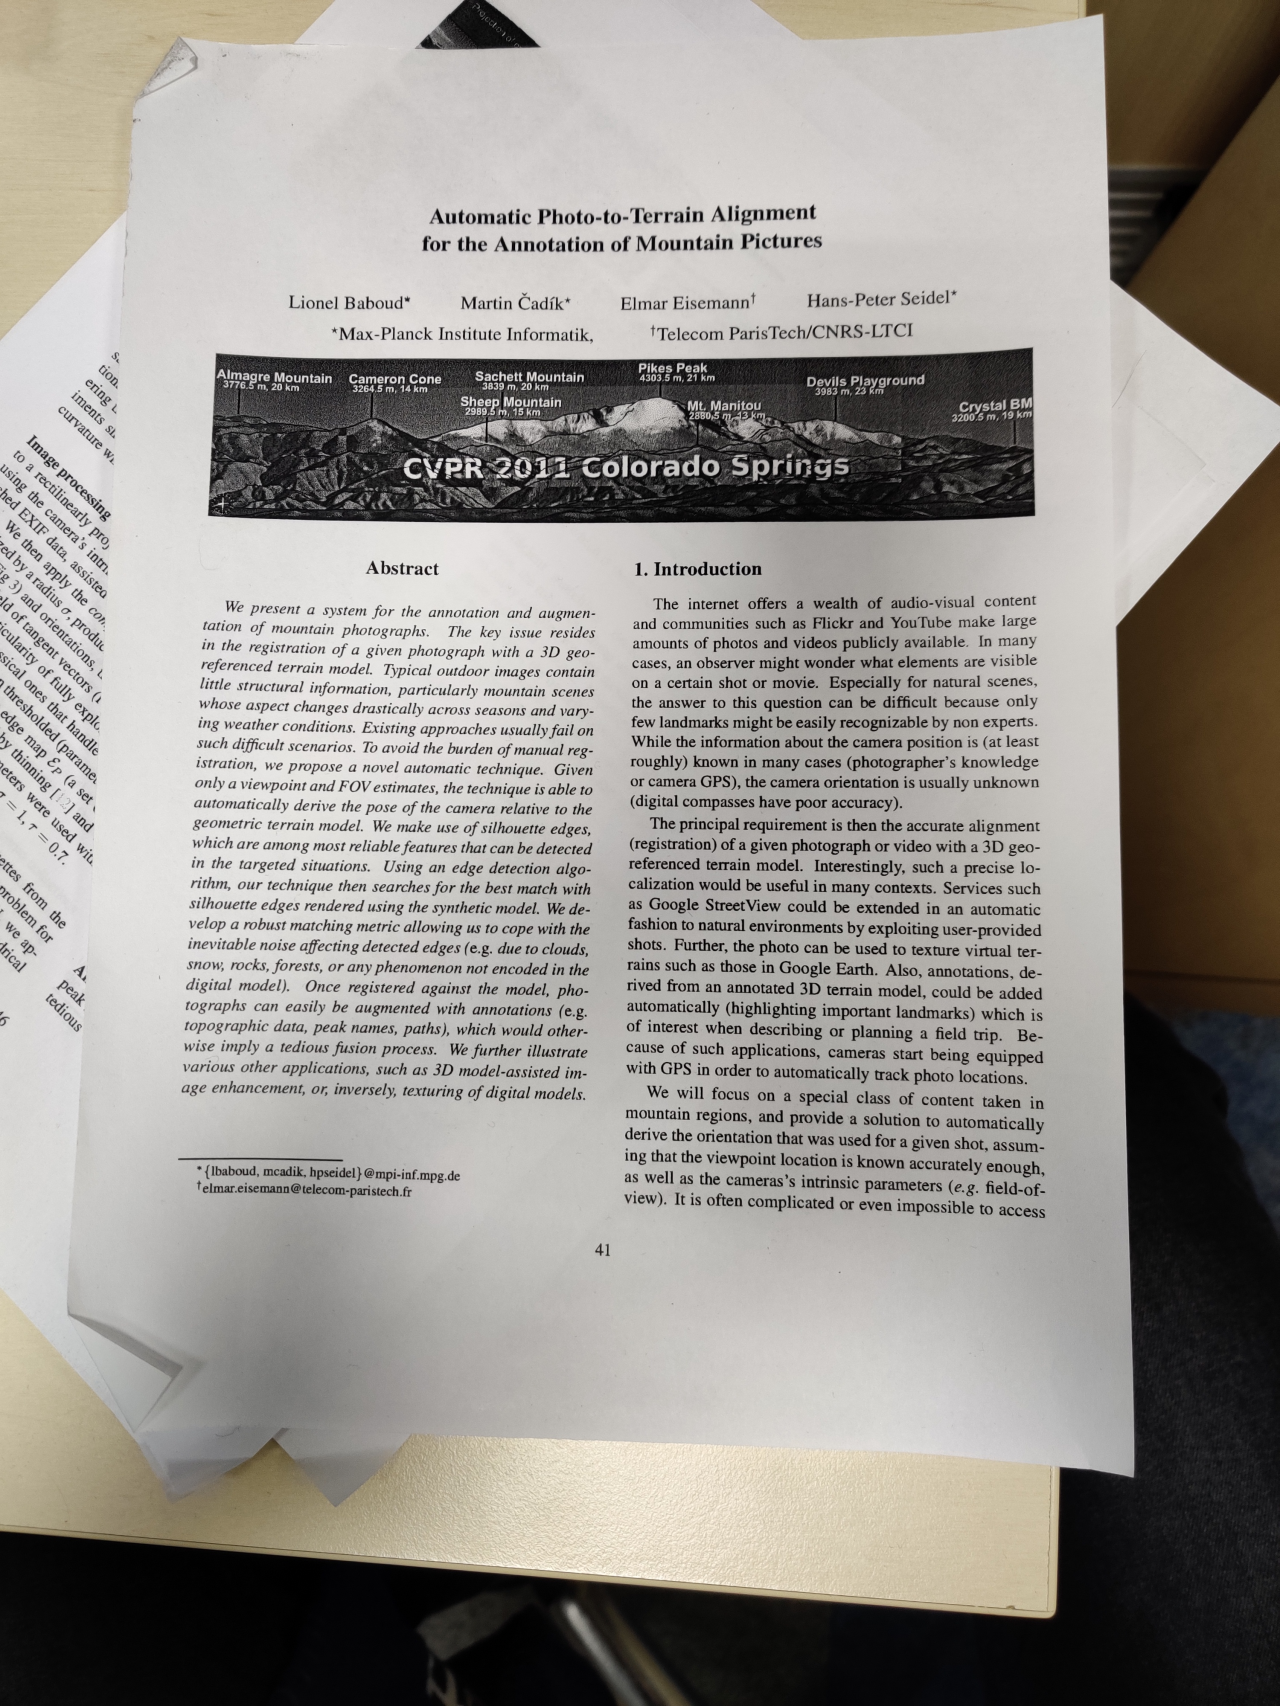

In [3]:
img.show(annotate=True)

In [4]:
l, t, w, h, conf, text, s = items[3]
print(conf, text)
Image.fromarray(cv2.cvtColor(s, cv2.COLOR_BGR2RGB)) #.save('potato.png')

NameError: name 'items' is not defined

In [ ]:
data = get_data_from_image(img=s)

In [ ]:
data